# Alpaca Demo

* Useful documentation links 
https://alpaca.markets/docs/api-documentation/how-to/account/


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [4]:
cd ..

/Users/armandoordorica/Documents/FinTech-Lesson-Plans/01-Lesson-Plans/05-APIs/2/Activities/04-Ins_Alpaca_Demo


In [5]:
cd ..

/Users/armandoordorica/Documents/FinTech-Lesson-Plans/01-Lesson-Plans/05-APIs/2/Activities


In [6]:
ls -a

./                           01-Ins_Create_Env_Variables/
../                          02-Ins_Call_Env_Variables/
.DS_Store                    03-Stu_Under_Lock_And_Key/
.env                         04-Ins_Alpaca_Demo/
.gitkeep                     05-Stu_Investment_Value/


In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [8]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


### To generate the alpaca object to retrieve stock market data, we will use the tradeapi.REST() function by passing the Alpaca keys as arguments and setting the API version we want to use. The current Alpaca API version is 2.0.

In [9]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-15", tz="America/New_York").isoformat()

###  We can retrieve stock data from up to 200 ticker names

In [15]:
# Set the tickers
tickers = ["FB", "TWTR"]

### Another important parameter we need to define to fetch stock data is the time frame we want to use. We can set the timeframe parameter in minutes (1Min, 5Min, 15Min) or one day (1D). We will create a variable called timeframe to set this parameter as 1D.

In [16]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

### Since we used the `df` property, the response is converted into a Pandas DataFrame to ease data manipulation

In [17]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

FB                                       TWTR  \
                             open     high     low     close    volume  open   
time                                                                           
2021-09-15 00:00:00-04:00  377.15  377.555  367.67  373.9398  15846327  60.1   

                                                          
                            high    low  close    volume  
time                                                      
2021-09-15 00:00:00-04:00  61.91  59.64  61.86  11299783

In [18]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-14", tz="America/New_York").isoformat()

In [19]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_portfolio_year.head(10)

FB                                        \
                             open      high       low   close    volume   
time                                                                      
2019-07-15 00:00:00-04:00  204.25  205.3300  201.8200  203.93  14535697   
2019-07-16 00:00:00-04:00  203.89  205.4707  203.1000  203.84  11166309   
2019-07-17 00:00:00-04:00  204.18  204.3600  201.5900  201.82  10611530   
2019-07-18 00:00:00-04:00  200.15  202.4700  199.3800  200.77  10174234   
2019-07-19 00:00:00-04:00  202.18  202.3300  198.0700  198.37  10173742   
2019-07-22 00:00:00-04:00  199.87  202.5700  198.8100  202.30  12053884   
2019-07-23 00:00:00-04:00  202.84  204.2420  200.9625  202.39  13145395   
2019-07-24 00:00:00-04:00  197.63  204.8100  197.2200  204.65  22221694   
2019-07-25 00:00:00-04:00  206.70  208.6600  198.2600  200.69  36432956   
2019-07-26 00:00:00-04:00  200.19  202.8800  196.2500  199.58  21614871   

                            TWTR                                      
                            open    high      low    close    volume  
time                                                                  
2019-07-15 00:00:00-04:00  38.00  38.970  37.9435  38.6900  11258081  
2019-07-16 00:00:00-04:00  38.78  38.790  37.8200  38.0100   9311635  
2019-07-17 00:00:00-04:00  37.86  38.230  37.5600  37.7087   7147682  
2019-07-18 00:00:00-04:00  37.39  37.795  37.0000  37.6800   9449129  
2019-07-19 00:00:00-04:00  37.96  38.090  36.7300  36.7700   9134941  
2019-07-22 00:00:00-04:00  36.92  37.690  36.8300  37.5800   7602555  
2019-07-23 00:00:00-04:00  37.87  38.020  36.8200  37.8950   9164443  
2019-07-24 00:00:00-04:00  38.00  38.800  37.7600  38.7400  10956259  
2019-07-25 00:00:00-04:00  39.00  39.230  37.9100  38.1100  18468672  
2019-07-26 00:00:00-04:00  40.07  42.330  40.0000  41.5300  48883208

In [24]:
df_portfolio_year.tail(10)

FB                                        TWTR  \
                             open     high       low   close    volume   open   
time                                                                            
2021-08-31 00:00:00-04:00  379.76  382.759  378.8000  379.30   9369889  64.52   
2021-09-01 00:00:00-04:00  379.66  384.330  378.8100  382.05  10282481  64.65   
2021-09-02 00:00:00-04:00  381.50  381.750  374.0600  375.33  13466095  65.97   
2021-09-03 00:00:00-04:00  374.43  377.160  373.1100  376.25   6430457  64.50   
2021-09-07 00:00:00-04:00  376.00  382.960  373.1500  382.11  10041699  64.89   
2021-09-08 00:00:00-04:00  380.29  380.870  374.7900  377.62   9702544  64.99   
2021-09-09 00:00:00-04:00  377.80  379.830  376.5650  378.02   8313868  62.37   
2021-09-10 00:00:00-04:00  381.06  383.790  378.2600  378.70  10040322  63.02   
2021-09-13 00:00:00-04:00  381.77  381.850  374.3451  376.51  10768226  61.28   
2021-09-14 00:00:00-04:00  377.40  378.590  375.1100  376.58   7341668  59.99   

                                                               
                              high      low   close    volume  
time                                                           
2021-08-31 00:00:00-04:00  65.1500  64.1600  64.495   7485764  
2021-09-01 00:00:00-04:00  66.7200  64.6500  65.550  14383000  
2021-09-02 00:00:00-04:00  66.0500  64.4142  64.590   7529635  
2021-09-03 00:00:00-04:00  65.0900  63.8500  64.670   4543831  
2021-09-07 00:00:00-04:00  65.1300  64.1501  64.980   5287502  
2021-09-08 00:00:00-04:00  65.3615  62.0800  62.270   9295397  
2021-09-09 00:00:00-04:00  63.1800  62.2400  62.455   5925351  
2021-09-10 00:00:00-04:00  63.3700  61.4700  61.573   6242300  
2021-09-13 00:00:00-04:00  61.4100  58.4495  59.680  14563961  
2021-09-14 00:00:00-04:00  60.7000  59.4900  60.210   7517905

In [29]:
summary_df= pd.DataFrame()
summary_df['FB'] = df_portfolio_year['FB']['close']
summary_df['TWTR'] = df_portfolio_year['TWTR']['close']
summary_df.index = summary_df.index.date
summary_df


,FB,TWTR
2019-07-15,203.93,38.6900
2019-07-16,203.84,38.0100
2019-07-17,201.82,37.7087
2019-07-18,200.77,37.6800
2019-07-19,198.37,36.7700
...,...,...
2021-09-08,377.62,62.2700
2021-09-09,378.02,62.4550
2021-09-10,378.70,61.5730
2021-09-13,376.51,59.6800


In [32]:
# Compute daily returns
df_daily_returns = summary_df.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,FB,TWTR
2019-07-16,-0.000441,-0.017576
2019-07-17,-0.009910,-0.007927
2019-07-18,-0.005203,-0.000761
2019-07-19,-0.011954,-0.024151
2019-07-22,0.019811,0.022029


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR over the Last Year'}>

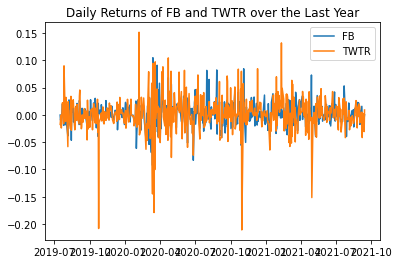

In [33]:
# Plot daily returns
df_daily_returns.plot(title="Daily Returns of FB and TWTR over the Last Year")